### Trabalho prático 2 - Bioinformatica
Gabriel Victor Carvalho Rocha - 2018054907  
Guilherme Bezerra dos Santos - <sua_matricula>

In [1]:
reads = ['TGGCA', 'GCATTGCAA', 'TGCAAT', 'CAATT', 'ATTTGAC']
dna_seq = 'TGGCATTGCAATTTGAC'

## Overlap Layout Consensus (OLC)

In [2]:
print(reads)

['TGGCA', 'GCATTGCAA', 'TGCAAT', 'CAATT', 'ATTTGAC']


In [3]:
def overlap(a, b, min_len=3):
    inicio = 0
    while True:
        inicio = a.find(b[:min_len], inicio)
        if inicio == -1:
            return 0
        elif b.startswith(a[inicio:]):
            return len(a) - inicio
        inicio += 1

In [4]:
print(overlap('TGGCA', 'GCATTGCAA', 3))

3


In [5]:
from itertools import permutations

def naive_overlap(reads, min_len):
    overlaps = dict()
    for a, b in permutations(reads, 2):
        overlap_len = overlap(a, b, min_len)
        if overlap_len > 0:
            overlaps[(a, b)] = overlap_len
    return overlaps

In [6]:
naive_overlap(reads, min_len=3)

{('TGGCA', 'GCATTGCAA'): 3,
 ('GCATTGCAA', 'TGCAAT'): 5,
 ('GCATTGCAA', 'CAATT'): 3,
 ('TGCAAT', 'CAATT'): 4,
 ('CAATT', 'ATTTGAC'): 3}

In [7]:
def pegar_maximo_overlap(reads, min_len):
    readA, readB = None, None
    melhor_overlap = 0
    for a, b in permutations(reads, 2):
        overlap_len = overlap(a, b, min_len)
        if overlap_len > melhor_overlap:
            readA, readB = a, b
            melhor_overlap = overlap_len
    return readA, readB, melhor_overlap

In [8]:
pegar_maximo_overlap(reads, min_len=3)

('GCATTGCAA', 'TGCAAT', 5)

In [9]:
def olc_guloso(reads, min_len):
    readA, readB, overlap_len = pegar_maximo_overlap(reads, min_len)
    while overlap_len > 0:
        reads.remove(readA)
        reads.remove(readB)
        reads.append(readA + readB[overlap_len:])
        readA, readB, overlap_len = pegar_maximo_overlap(reads, min_len)
    return ''.join(reads)

In [10]:
olc_guloso(reads, min_len=3)

'TGGCATTGCAATTTGAC'

## Grafos de Bruijin (DBG)

In [11]:
print(dna_seq)

TGGCATTGCAATTTGAC


In [12]:
def de_bruijin_graph(dna_seq, kmer):
    vertices = set()
    arestas = list()
    for i in range(len(dna_seq) - kmer + 1):
        vertices.add(dna_seq[i: i + kmer - 1])
        vertices.add(dna_seq[i + 1: i + kmer])
        
        arestas.append((dna_seq[i: i + kmer - 1], dna_seq[i + 1: i + kmer]))
    return vertices, arestas

In [13]:
vertices, arestas = de_bruijin_graph(dna_seq, 4)

In [14]:
print(f"Os vértices são {vertices}")

Os vértices são {'TGA', 'ATT', 'TTT', 'GAC', 'CAT', 'CAA', 'GGC', 'TGC', 'TTG', 'AAT', 'TGG', 'GCA'}


In [15]:
print(f"As arestas são {arestas}")

As arestas são [('TGG', 'GGC'), ('GGC', 'GCA'), ('GCA', 'CAT'), ('CAT', 'ATT'), ('ATT', 'TTG'), ('TTG', 'TGC'), ('TGC', 'GCA'), ('GCA', 'CAA'), ('CAA', 'AAT'), ('AAT', 'ATT'), ('ATT', 'TTT'), ('TTT', 'TTG'), ('TTG', 'TGA'), ('TGA', 'GAC')]


In [31]:
def visualizar_de_bruijin(dna_seq, kmer):
    vertices, arestas = de_bruijin_graph(dna_seq, kmer)

    dot_str = 'digraph "DeBruijin graph" {\n'

    for v in vertices:
        dot_str += f' {v} [label="{v}"];\n'
    for fonte, destino in arestas:
        dot_str += f' {fonte} -> {destino};\n'
    return dot_str + '}\n'

In [32]:
print(visualizar_de_bruijin(dna_seq, 4))

digraph "DeBruijin graph" {
 TGA [label="TGA"];
 ATT [label="ATT"];
 TTT [label="TTT"];
 GAC [label="GAC"];
 CAT [label="CAT"];
 CAA [label="CAA"];
 GGC [label="GGC"];
 TGC [label="TGC"];
 TTG [label="TTG"];
 AAT [label="AAT"];
 TGG [label="TGG"];
 GCA [label="GCA"];
 TGG -> GGC;
 GGC -> GCA;
 GCA -> CAT;
 CAT -> ATT;
 ATT -> TTG;
 TTG -> TGC;
 TGC -> GCA;
 GCA -> CAA;
 CAA -> AAT;
 AAT -> ATT;
 ATT -> TTT;
 TTT -> TTG;
 TTG -> TGA;
 TGA -> GAC;
}



In [33]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


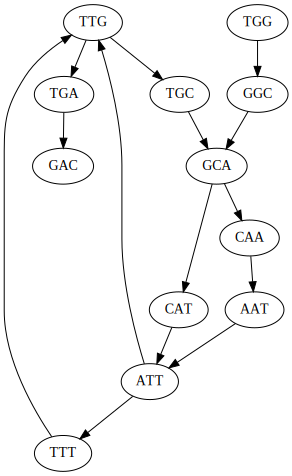

In [34]:
%dotstr visualizar_de_bruijin(dna_seq, 4)